<a href="https://colab.research.google.com/github/ywan1416/MAT422/blob/main/HW_3_5%2C3_6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

# 3.5. K-means

The K-means clustering

The K-means clustering algorithm partitions data into multiple clusters by first randomly selecting initial cluster centers. Each data point is then assigned to the nearest cluster based on Euclidean distance. The algorithm iteratively recalculates the cluster centers as the mean of the points within each cluster.

While K-means can converge to an optimal solution, finding the global optimum is computationally challenging.

In [23]:
# Define the data
data = {
    'Point': ['A', 'B', 'C', 'D', 'E'],
    'X1': [1, 1, 0, 2, 3],
    'X2': [1, 0, 2, 4, 5]
}
df = pd.DataFrame(data)

# Define the centroids
c1 = np.array([1, 0.5])
c2 = np.array([1.7, 3.7])

# Calculate Euclidean distances
df['Distance to Centroid 1'] = np.sqrt((df['X1'] - c1[0]) ** 2 + (df['X2'] - c1[1]) ** 2)
df['Distance to Centroid 2'] = np.sqrt((df['X1'] - c2[0]) ** 2 + (df['X2'] - c2[1]) ** 2)

print(df[['Point', 'Distance to Centroid 1', 'Distance to Centroid 2']])


  Point  Distance to Centroid 1  Distance to Centroid 2
0     A                0.500000                2.789265
1     B                0.500000                3.765634
2     C                1.802776                2.404163
3     D                3.640055                0.424264
4     E                4.924429                1.838478


# 3.6. Support vector machine


A Support Vector Machine is a supervised learning algorithm that aims to find the optimal hyperplane that best separates two classes of data points. By maximizing the margin, or distance, between the hyperplane and the nearest data points from each class, SVM ensures a clear boundary that helps improve classification accuracy. This maximized margin gives the model greater confidence in distinguishing between classes, making it robust to new, unseen data.



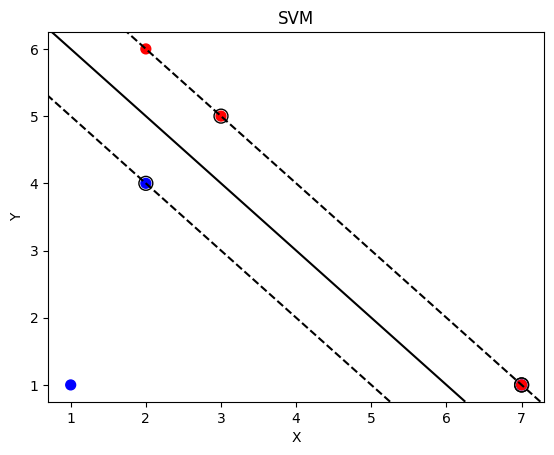

In [24]:
#Define the data
X = np.array([[1, 1], [2, 4], [7, 1], [3, 5], [7, 1], [2, 6]])
y = [0, 0, 0, 1, 1, 1]  # Labels for the two classes

# See SVM with a linear kernel
model = svm.SVC(kernel='linear')
model.fit(X, y)

# Plot the figure
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('SVM')
plt.show()
